In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [12]:
df=pd.read_csv("peticoes_tokenizadas.csv",index_col=0)

In [16]:
# Suponha que seu DataFrame seja chamado "df" e que a coluna de destino seja "classe"
X = df.drop('classe', axis=1)
y = df['classe']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve,confusion_matrix

k=10
# Criar uma instância do classificador KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
Y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, Y_pred)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        16

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



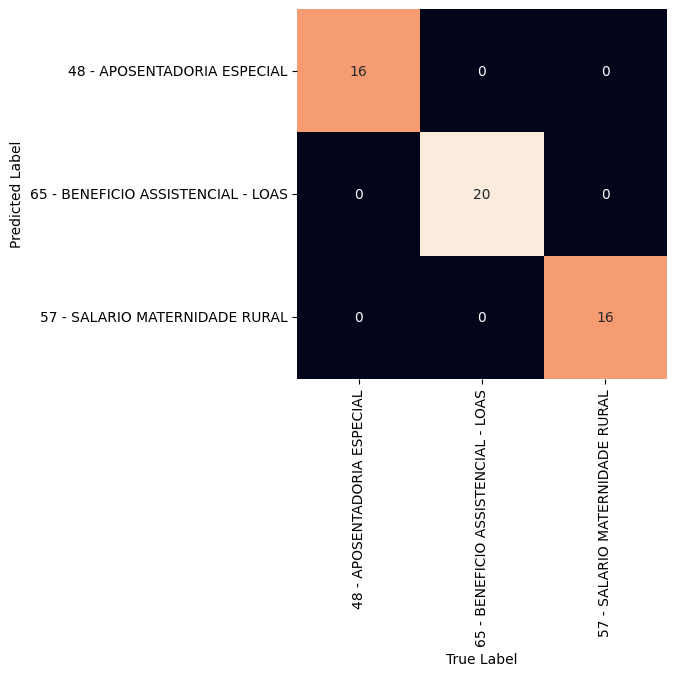

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

classe_match ={'48 - APOSENTADORIA ESPECIAL': 0,
 '65 - BENEFICIO ASSISTENCIAL - LOAS': 1,
 '57 - SALARIO MATERNIDADE RURAL': 2}

# imprimir relatório 
print(classification_report(y_test, Y_pred))


# Imprime a matriz de confusão 
mat = confusion_matrix(y_test, Y_pred)

sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=list(classe_match.keys()),yticklabels=list(classe_match.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()